# W43 MM2 MM3

In [2]:
import aplpy
from astropy.io import fits
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
plt.rc('font', **{'family': 'serif', 'size': 26})
plt.rc('lines', linewidth = 2.5)
plt.rc('text', usetex=True)

In [4]:
from pywavan import powspec, fan_trans, fbm2d, apodize, padding

In [5]:
import pandas as pd

In [26]:
cores = pd.read_csv("/Users/robitaij/postdoc/ALMA/w43mm2mm3b6.1000.final.relitent.csv", sep=';', header=0)
nb = cores['NO'].to_numpy()
ac = cores['WCS_ACOOR'].to_numpy()
dec = cores['WCS_DCOOR'].to_numpy()
width = cores['AFWHM01'].to_numpy()
height = cores['BFWHM01'].to_numpy()
angle = cores['THETA01'].to_numpy()
reject = cores['!   '].to_numpy()

In [14]:
figfile = '/Users/robitaij/postdoc/ALMA/W43-MM2MM3_B6_pbcorB.fits'

INFO: Auto-setting vmin to -1.938e-03 [aplpy.core]
INFO: Auto-setting vmax to  5.580e-03 [aplpy.core]


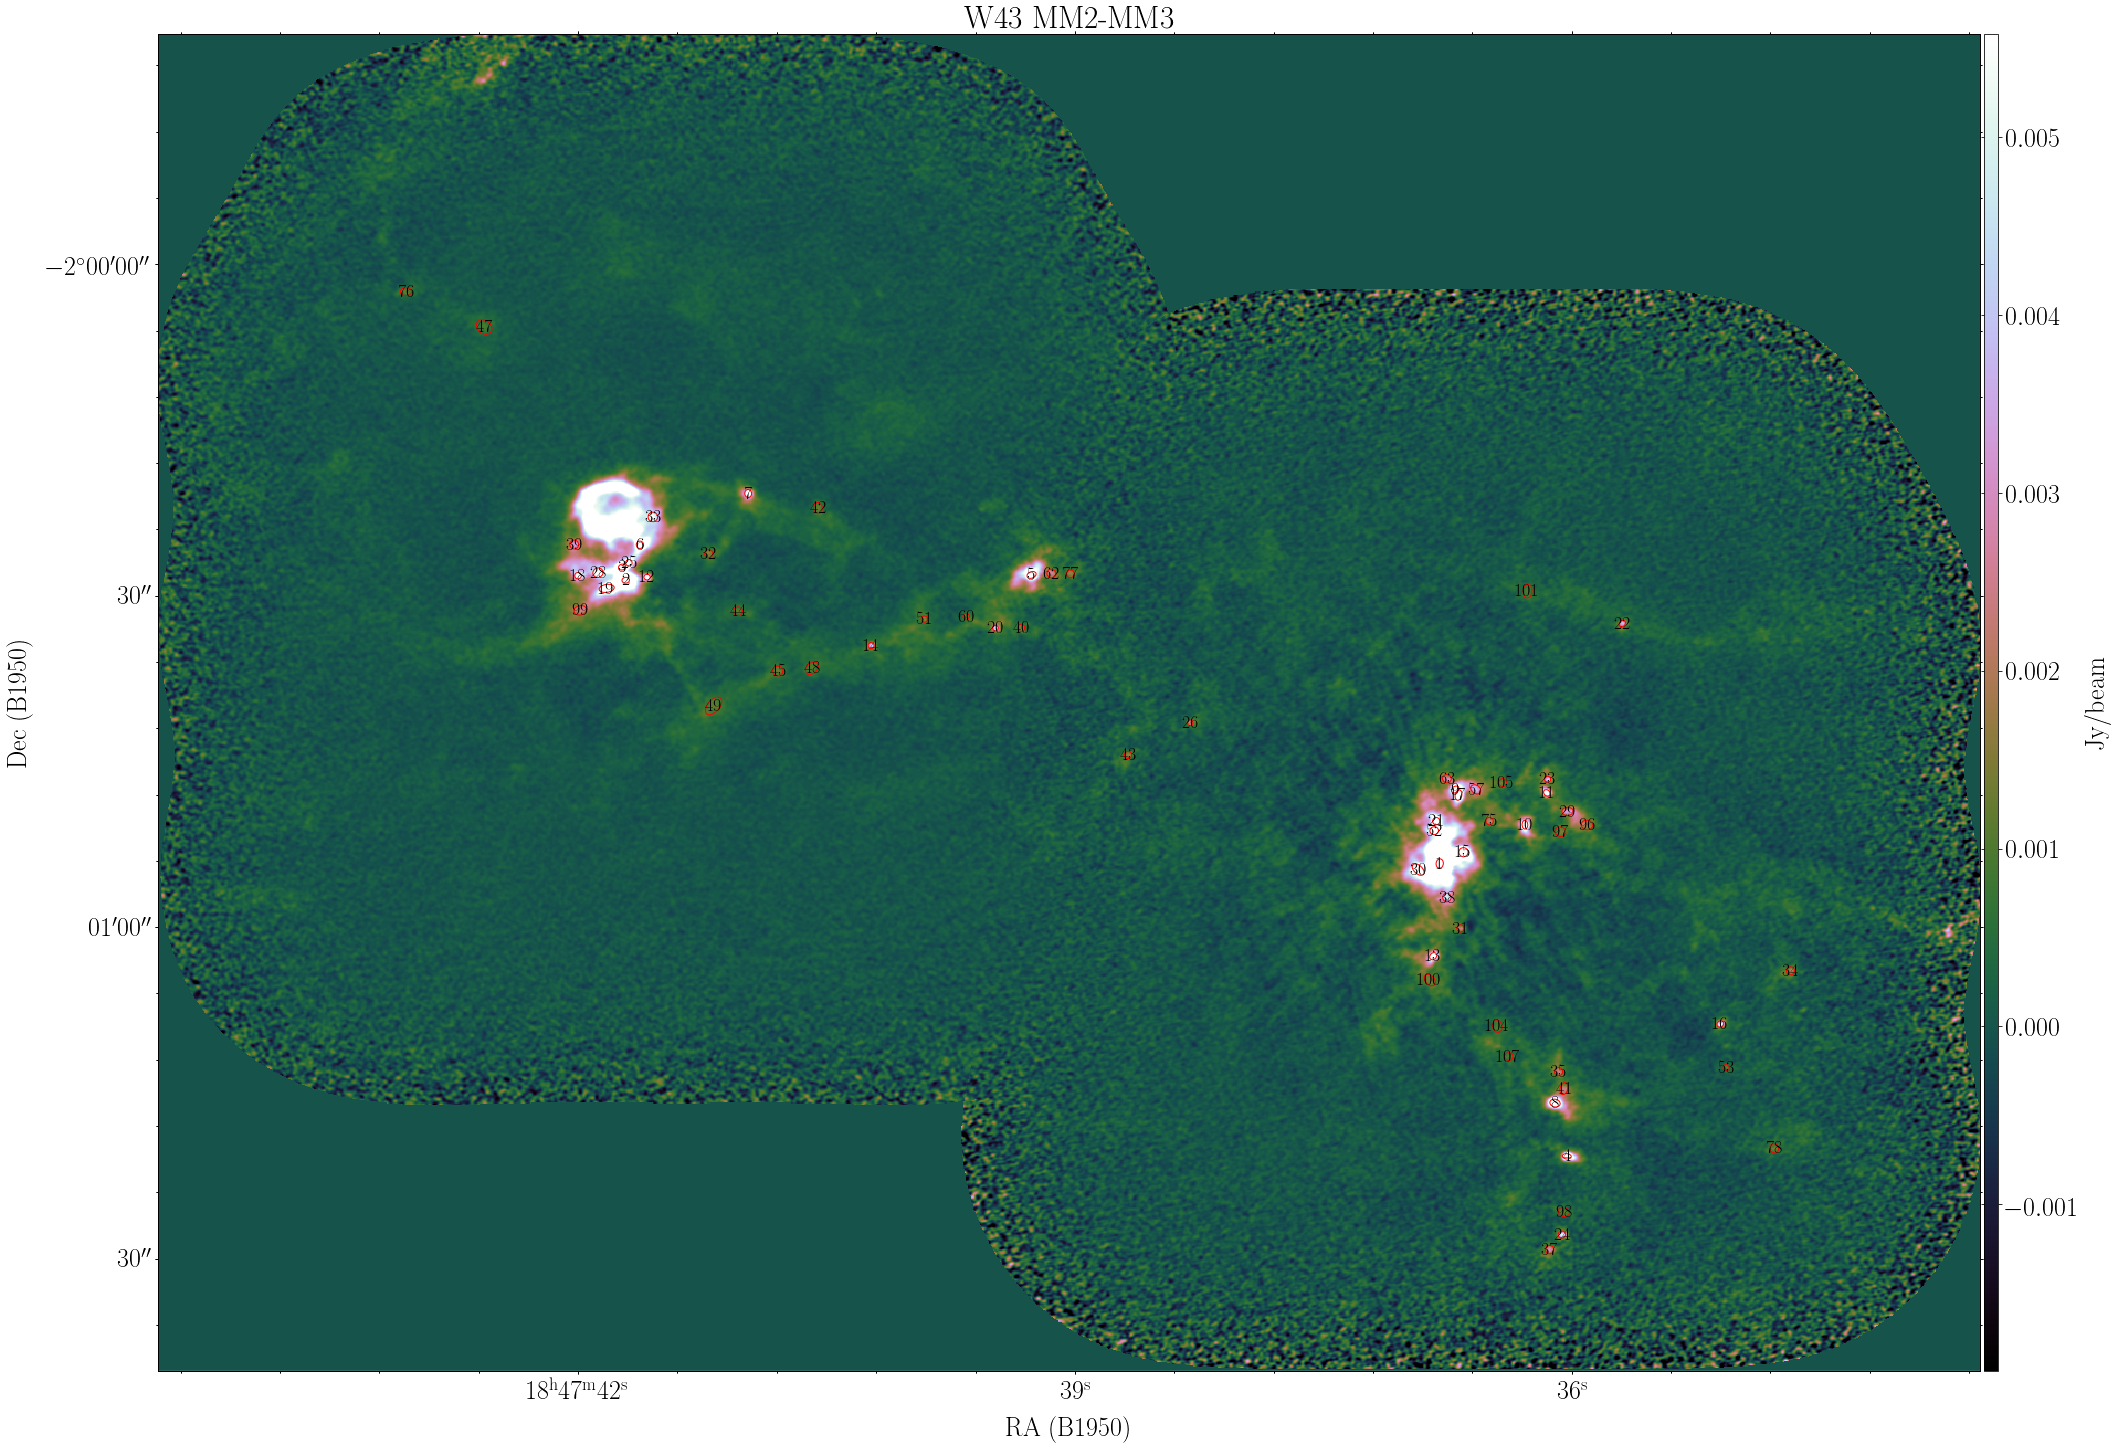

In [56]:
fig_all = plt.figure(1, figsize=(30,30))

fig = aplpy.FITSFigure(figfile,figure=fig_all,slices=[2,3])
fig.show_colorscale(cmap='cubehelix')
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'Jy/beam')
fig.set_title("W43 MM2-MM3")
flag = np.where(reject != '!   ')
fig.show_ellipses(ac[flag], dec[flag], width[flag]/3600., height[flag]/3600., angle=angle[flag]-90., edgecolor='red', facecolor='none')
for ii in flag[0][1:]:
    fig.add_label(ac[ii], dec[ii], ii, color='black',fontsize=18)
(xp, yp) = fig.world2pixel(ac, dec)

plt.tight_layout()
figpath = '/Users/robitaij/postdoc/talks/ALMA-IMF/images/'
plt.savefig(figpath+'W43-MM2MM3.pdf',dpi=150,bbox_inches='tight')

In [13]:
#Read map
HDU = fits.open(figfile)
imf = HDU[0].data
im = imf[0,0,:,:]
del imf
header = HDU[0].header

#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

#Replace Nan
im[im != im] = 0.

hdcopy = header.copy()
del hdcopy['NAXIS3'], hdcopy['CTYPE3'], hdcopy['CRVAL3'], hdcopy['CDELT3'], hdcopy['CRPIX3'], hdcopy['CROTA3'], hdcopy['NAXIS4'], hdcopy['CTYPE4'], hdcopy['CRVAL4'], hdcopy['CDELT4'], hdcopy['CRPIX4'], hdcopy['CROTA4']
hdcopy['NAXIS'] = 2

fits.writeto('/Users/robitaij/postdoc/ALMA/W43-MM2MM3_B6_pbcorB.fits',im,hdcopy)

In [ ]:
meanim = np.mean(im)
#na = im.shape[1]
#nb = im.shape[0]
#imzm = im - meanim

#Apodization
#tapper = apodize(nb,na,0.98)
#imt = imzm *tapper
#newdim = np.array((1800,1800))
#imr = padding(imt,newdim[0],newdim[1])

#Fourier power spectrum
tab_k, spec_k = powspec(im, reso=reso)

#noise = S1a[0,20]

In [ ]:
#Set a list of q
q=[]
q=[2.5]*26
#newdim = np.array((1800,1800))

#Wavelet power spectrum
wt, S11a, wav_k, S1a, q = fan_trans(im, reso=reso, q=q, qdyn=True, skewl=0.4, smooth=False, angular=True)

In [59]:
plt.figure(figsize(12,9))
plt.plot(tab_k, spec_k, color='black',label=r'Total Fourier')
#plt.plot(wav_k[1:-2], S1a[1:-2],'D', markersize = 11, markerfacecolor='none', markeredgecolor='black', label='Total wavelet')
plt.plot(wav_k[1:-2], S1a[2,1:-2],'D', markersize = 11, markerfacecolor='none', markeredgecolor='red', label='Gaussian wavelet')
plt.plot(wav_k[1:-2], S1a[1,1:-2],'^', markersize = 11, markerfacecolor='none', markeredgecolor='blue', label='Coherent wavelet')
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (arcmin$^{-1}$)')
plt.ylabel(r'$P(k)$')
plt.legend()

NameError: name 'tab_k' is not defined

<Figure size 864x648 with 0 Axes>

In [61]:
M = wav_k.size

coherent = np.sum(wt[M:2*M,:,:],axis=0) + np.sum(wt[2*M:2*M+6,:,:],axis=0) + meanim
Gaussian = np.sum(wt[2*M+6:3*M,:,:],axis=0) + meanim

hdcopy = header.copy()
del hdcopy['NAXIS3'], hdcopy['CTYPE3'], hdcopy['CRVAL3'], hdcopy['CDELT3'], hdcopy['CRPIX3'], hdcopy['CROTA3'], hdcopy['NAXIS4'], hdcopy['CTYPE4'], hdcopy['CRVAL4'], hdcopy['CDELT4'], hdcopy['CRPIX4'], hdcopy['CROTA4']
hdcopy['NAXIS'] = 2

fits.writeto('/Users/robitaij/postdoc/ALMA/analysis/W43-MM2MM3_B6_cohe.fits',\
            coherent.real,hdcopy,overwrite=True)
fits.writeto('/Users/robitaij/postdoc/ALMA/analysis/W43-MM2MM3_B6_gaussian.fits',\
            Gaussian.real,hdcopy,overwrite=True)

INFO: Auto-setting vmin to -2.996e-04 [aplpy.core]
INFO: Auto-setting vmax to  3.334e-04 [aplpy.core]
INFO: Auto-setting vmin to -2.100e-03 [aplpy.core]
INFO: Auto-setting vmax to  6.066e-03 [aplpy.core]


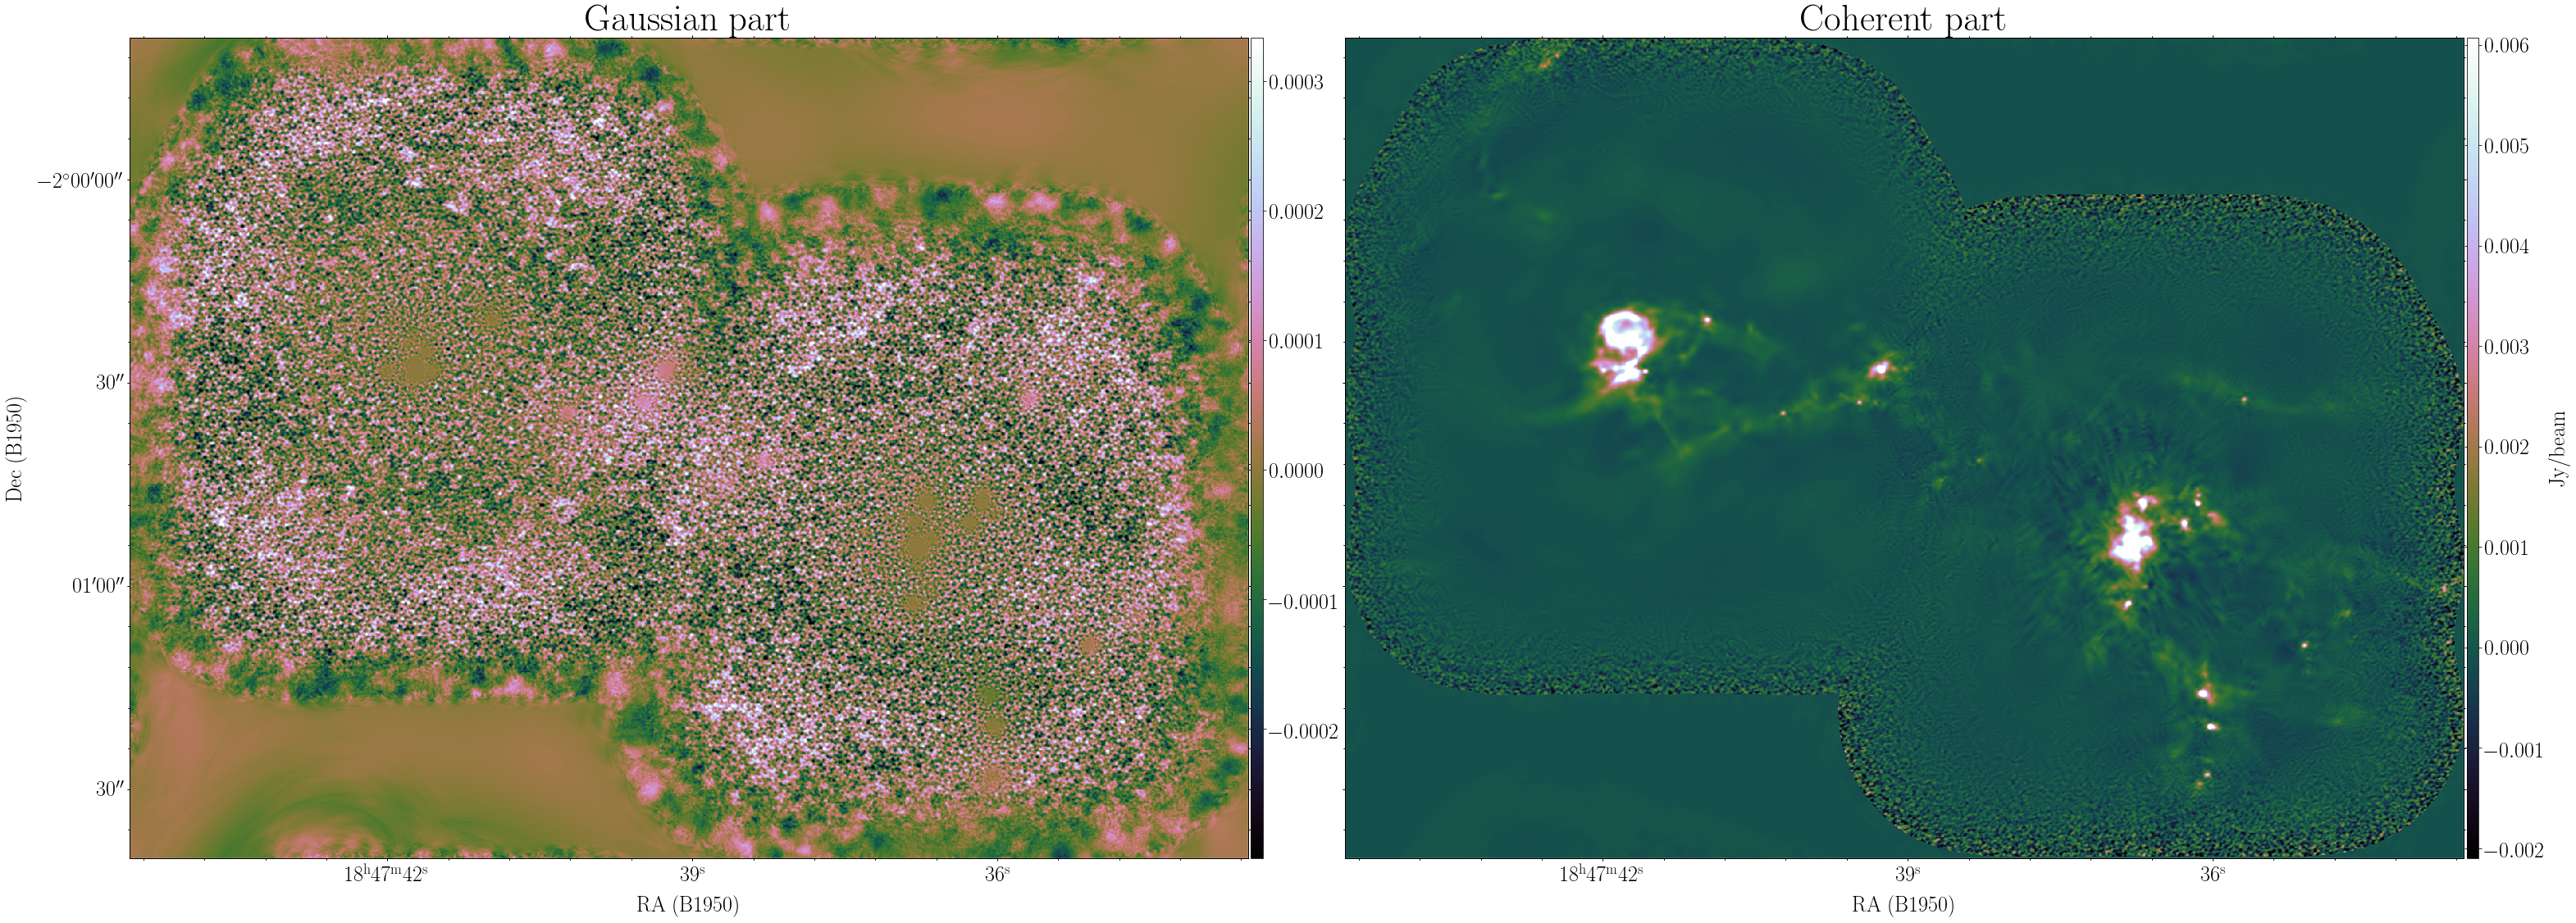

In [63]:
fig_all = plt.figure(1, figsize=(44,30))

figfile = '/Users/robitaij/postdoc/ALMA/analysis/W43-MM2MM3_B6_gaussian.fits'
fig = aplpy.FITSFigure(figfile, figure=fig_all, convention='calabretta',subplot=(2, 2, 1))
fig.show_colorscale(cmap='cubehelix')
fig.add_colorbar()
fig.set_title('Gaussian part',fontsize='xx-large')

figfile = '/Users/robitaij/postdoc/ALMA/analysis/W43-MM2MM3_B6_cohe.fits'
fig = aplpy.FITSFigure(figfile, figure=fig_all, convention='calabretta',subplot=(2, 2, 2))
fig.show_colorscale(cmap='cubehelix')
fig.tick_labels.hide_y()
fig.axis_labels.hide_y()
fig.add_colorbar()
fig.colorbar.set_axis_label_text(r'Jy/beam')
fig.set_title('Coherent part',fontsize='xx-large')

plt.tight_layout()
plt.savefig(figpath+'W43-MM2MM3_B6_reconstruction.pdf',dpi=150,bbox_inches='tight')